In [208]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\AMITHK\Downloads\Data Trained\Projects\Week 2\Census Income Project\census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [209]:
df.shape

(32560, 15)

In [210]:
# We have ? in some columns

df =df[df['Occupation'] != ' ?']
df = df[df['Workclass'] != ' ?']
df = df[df['Native_country'] != ' ?']


In [211]:
df.shape

(30161, 15)

C:\Users\AMITHK\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


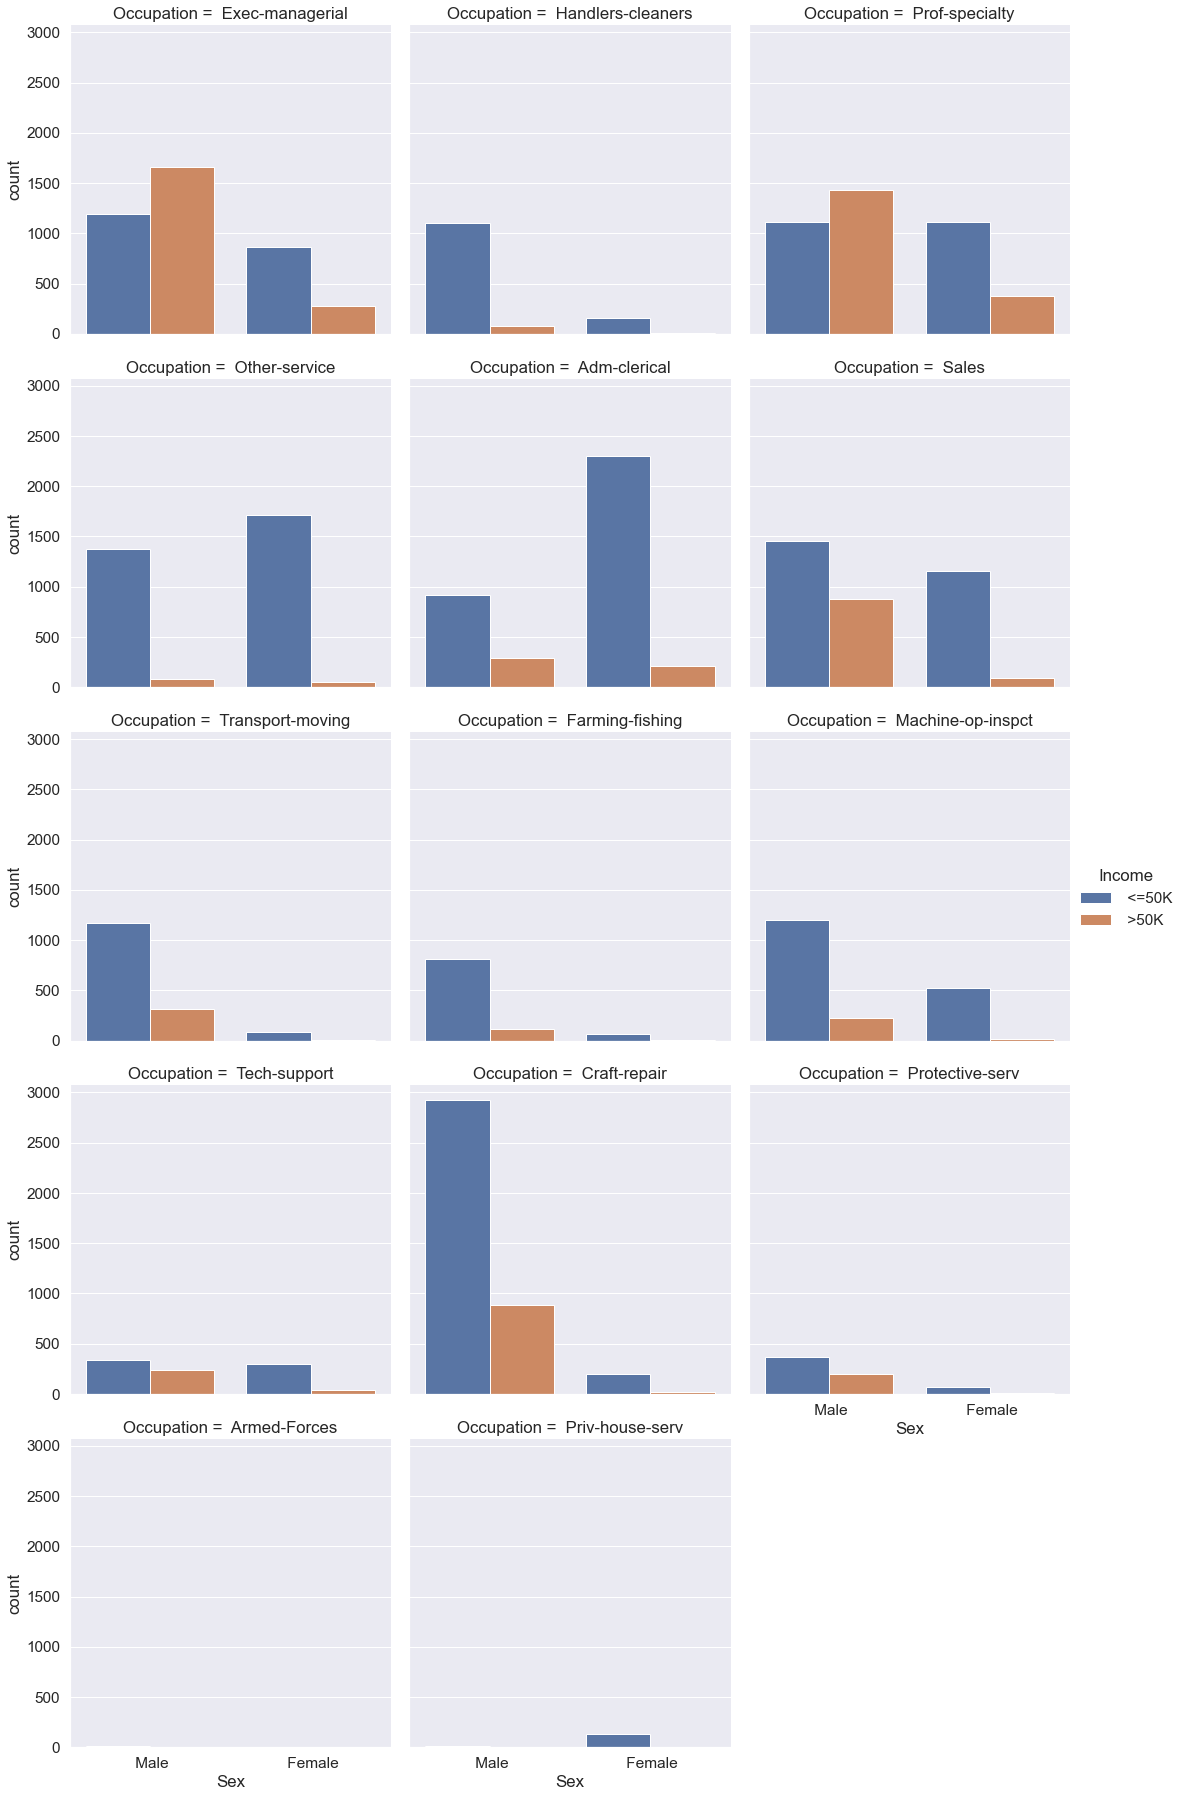

In [212]:
# How monthly Income affect Attrition
import seaborn as sns
g = sns.catplot('Sex',col="Occupation",data=df,hue='Income',kind='count',col_wrap=3,legend=True)

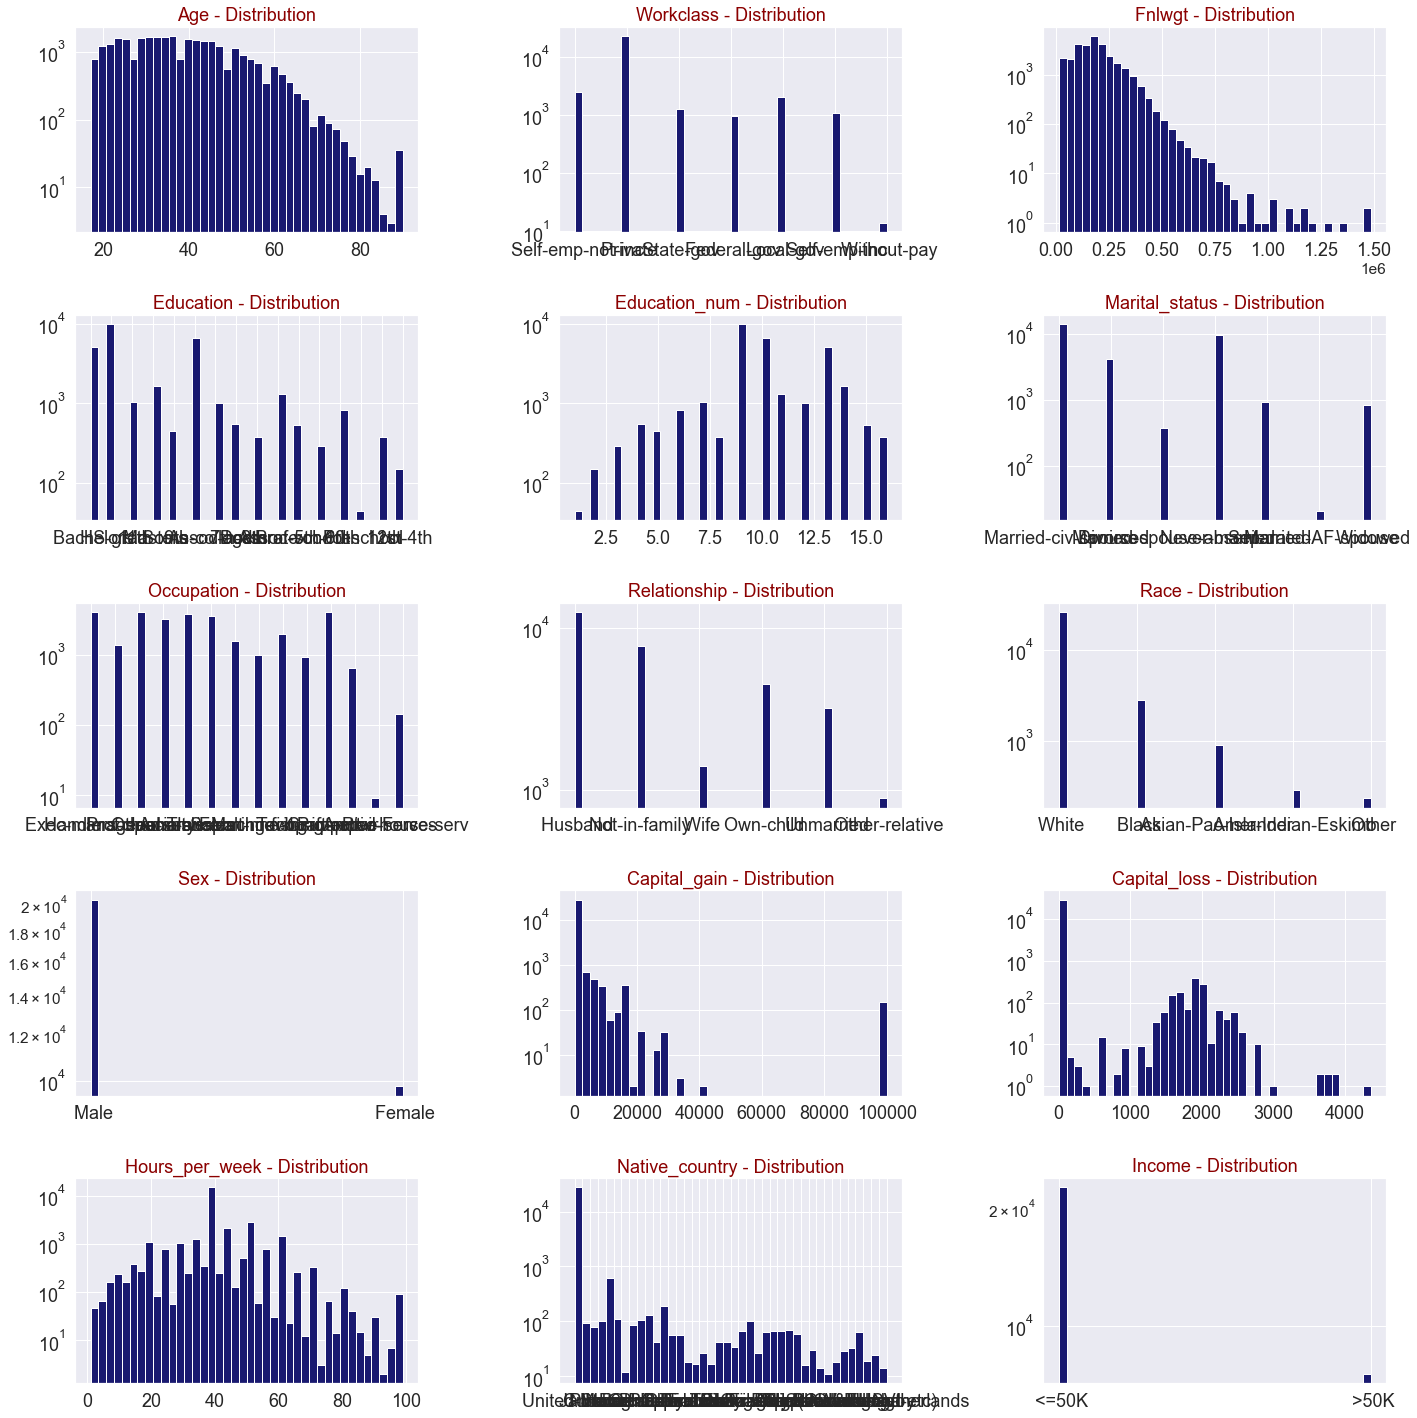

In [213]:
import matplotlib.pyplot as plt

def draw_histogram(dataframe,features,row,col):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(row,col,i+1)
        dataframe[feature].hist(bins=40,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" - Distribution",color="DarkRed",fontsize=18)
        ax.set_yscale('log')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        
    fig.tight_layout()
    plt.show()

draw_histogram(df,df.columns,5,3)

In [214]:
del df['Fnlwgt']

In [215]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [219]:
df['Income'] = df.apply(lambda x : 0 if x['Income'] == " <=50K" else 1,axis=1)
df['Income'].value_counts(sort=True)

0    22653
1     7508
Name: Income, dtype: int64

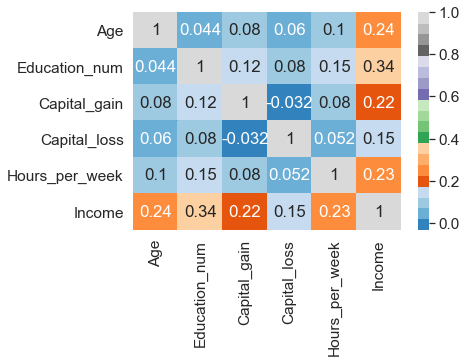

In [220]:
import seaborn as sns

sns.heatmap(df.corr() , annot = True, cmap="tab20c")
sns.set(font_scale=1.4)
plt.show()

In [221]:

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

num_cols = ['Age','Education_num','Capital_gain','Capital_loss']
df[num_cols] = std.fit_transform(df[num_cols])

df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.880275,Self-emp-not-inc,Bachelors,1.128961,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.147437,-0.21859,13,United-States,0
1,-0.033338,Private,HS-grad,-0.439703,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.147437,-0.21859,40,United-States,0
2,1.108678,Private,11th,-1.224035,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.147437,-0.21859,40,United-States,0
3,-0.794682,Private,Bachelors,1.128961,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.147437,-0.21859,40,Cuba,0
4,-0.109472,Private,Masters,1.521127,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.147437,-0.21859,40,United-States,0


In [222]:
df = pd.get_dummies(data=df)

In [223]:
df.head()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.880275,1.128961,-0.147437,-0.21859,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.033338,-0.439703,-0.147437,-0.21859,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.108678,-1.224035,-0.147437,-0.21859,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.794682,1.128961,-0.147437,-0.21859,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.109472,1.521127,-0.147437,-0.21859,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [224]:
from sklearn.model_selection import train_test_split

X=df.drop(['Income'],axis=1).values
y = df['Income'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [225]:

df['Income'].value_counts(sort=True)

0    22653
1     7508
Name: Income, dtype: int64

In [226]:
test = pd.DataFrame(X)

# Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

LRmodel = LogisticRegression()
LRmodel.fit(X_train,y_train)
predictions = LRmodel.predict(X_test)

print ("Accuracy score  {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy score  85.01%
[[6327  495]
 [ 861 1366]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6822
           1       0.73      0.61      0.67      2227

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049



C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Feature Importance

In [228]:
coef = LRmodel.coef_[0]
coef = [abs(number) for number in coef]
print (coef)

[0.34704621399023444, 0.7017052624749737, 2.1901101134125365, 0.24938764812043324, 0.02814882935040549, 0.3054054904879573, 0.33981326850587396, 0.18944868186980973, 0.012672846471922105, 0.7062213649523079, 0.5209103386943197, 0.06853691020002209, 0.005675128833059905, 0.2149243332728726, 0.14011619644389595, 0.000693336117443961, 0.03895944422039335, 0.05713475556596228, 0.06480451258064199, 0.5019559410533364, 0.29719882791670227, 0.06974926264493142, 0.07244474134918553, 0.11136224647276999, 0.11705350282438502, 0.04966201099481739, 0.3153588236521886, 0.10720917580297568, 0.44975340492704874, 0.16093227156333548, 0.9264999742335155, 0.37603438719853266, 1.0379493308304961, 0.3873900029357082, 0.3685030401111799, 0.12275471852507693, 0.012026100254950623, 0.05092204072050033, 0.6648817966943746, 0.9720888632150264, 0.8127714370930158, 0.4008676739472554, 0.9490488423159813, 0.15958337155968286, 0.37720351431600235, 0.41010383136924566, 0.18538443803006935, 0.4781263209190658, 0.167

In [229]:
cols=list(df.columns)
cols.index("Income")

5

In [231]:
del cols[5]


In [232]:
#Sorting on Feature Importance
sorted_index = sorted(range(len(coef)),key= lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Capital_gain
Relationship_ Unmarried
Race_ Amer-Indian-Eskimo
Sex_ Male
Marital_status_ Separated
Occupation_ Handlers-cleaners
Occupation_ Priv-house-serv
Marital_status_ Married-spouse-absent
Occupation_ Machine-op-inspct
Workclass_ State-gov
Education_num
Occupation_ Farming-fishing
Relationship_ Own-child
Workclass_ Without-pay
Relationship_ Wife
Education_ Assoc-voc
Occupation_ Transport-moving
Marital_status_ Married-AF-spouse
Native_country_ Nicaragua
Occupation_ Sales
Occupation_ Other-service
Race_ Other
Marital_status_ Widowed
Occupation_ Protective-serv
Marital_status_ Never-married
Occupation_ Adm-clerical
Native_country_ Cambodia
Age
Workclass_ Private
Education_ Some-college
Workclass_ Local-gov
Race_ Black
Race_ Asian-Pac-Islander
Education_ Bachelors
Relationship_ Other-relative
Sex_ Female
Race_ White
Capital_loss
Native_country_ Iran
Education_ 12th
Workclass_ Self-emp-inc
Occupation_ Tech-support
Relationship_ Husband
Native_country_ Cuba
Marital_status_ Married-civ-

IndexError: list index out of range

# Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

RFCmodel = RandomForestClassifier()
RFCmodel.fit(X_train,y_train)
predictions = RFCmodel.predict(X_test)
score = RFCmodel.score(X_test,y_test)

print ("Accuracy score  {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy score  84.98%
[[6264  558]
 [ 801 1426]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6822
           1       0.72      0.64      0.68      2227

    accuracy                           0.85      9049
   macro avg       0.80      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049



# Support Vector Classifier

In [236]:
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC(random_state=0, tol=1e-5)

SVCmodel.fit(X_train, y_train.ravel()) 

predictions = SVCmodel.predict(X_test)
score = SVCmodel.score(X_test,y_test)
print ("Accuracy score  {0:.2f}%".format(100*accuracy_score(predictions,y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy score  77.61%
[[4987 1835]
 [ 191 2036]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      6822
           1       0.53      0.91      0.67      2227

    accuracy                           0.78      9049
   macro avg       0.74      0.82      0.75      9049
weighted avg       0.86      0.78      0.79      9049



C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [240]:
from sklearn.preprocessing import binarize

for i in range(0,50):
    cm2=0
    y_pred_prob_yes = LRmodel.predict_proba(X_test)
    y_pred2 = binarize(y_pred_prob_yes , i/50)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print('With',i/10,'threshold the confusion Matrix is' , '\n', cm2 , '\n',
         'with',cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0],'False Negatives')

C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.02 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.04 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.06 as keyword args. From version 0.25 passing these as positional arguments will re

With 0.0 threshold the confusion Matrix is 
 [[   0 6822]
 [   0 2227]] 
 with 2227 correct predictions and 0 False Negatives
With 0.1 threshold the confusion Matrix is 
 [[2216 4606]
 [  11 2216]] 
 with 4432 correct predictions and 11 False Negatives
With 0.2 threshold the confusion Matrix is 
 [[3094 3728]
 [  25 2202]] 
 with 5296 correct predictions and 25 False Negatives
With 0.3 threshold the confusion Matrix is 
 [[3645 3177]
 [  51 2176]] 
 with 5821 correct predictions and 51 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.08 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.14 as keyword args. From version 0.25 passing these as positional arguments will re

With 0.4 threshold the confusion Matrix is 
 [[3970 2852]
 [  69 2158]] 
 with 6128 correct predictions and 69 False Negatives
With 0.5 threshold the confusion Matrix is 
 [[4231 2591]
 [  89 2138]] 
 with 6369 correct predictions and 89 False Negatives
With 0.6 threshold the confusion Matrix is 
 [[4442 2380]
 [ 104 2123]] 
 with 6565 correct predictions and 104 False Negatives
With 0.7 threshold the confusion Matrix is 
 [[4637 2185]
 [ 126 2101]] 
 with 6738 correct predictions and 126 False Negatives
With 

C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.16 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.18 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.22 as keyword args. From version 0.25 passing these as positional arguments will re

0.8 threshold the confusion Matrix is 
 [[4804 2018]
 [ 152 2075]] 
 with 6879 correct predictions and 152 False Negatives
With 0.9 threshold the confusion Matrix is 
 [[4955 1867]
 [ 191 2036]] 
 with 6991 correct predictions and 191 False Negatives
With 1.0 threshold the confusion Matrix is 
 [[5099 1723]
 [ 223 2004]] 
 with 7103 correct predictions and 223 False Negatives
With 1.1 threshold the confusion Matrix is 
 [[5226 1596]
 [ 257 1970]] 
 with 7196 correct predictions and 257 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.24 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.26 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.28 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


With 1.2 threshold the confusion Matrix is 
 [[5357 1465]
 [ 295 1932]] 
 with 7289 correct predictions and 295 False Negatives
With 1.3 threshold the confusion Matrix is 
 [[5468 1354]
 [ 328 1899]] 
 with 7367 correct predictions and 328 False Negatives
With 1.4 threshold the confusion Matrix is 
 [[5583 1239]
 [ 379 1848]] 
 with 7431 correct predictions and 379 False Negatives
With 1.5 threshold the confusion Matrix is

C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.34 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.36 as keyword args. From version 0.25 passing these as positional arguments will re

 
 [[5672 1150]
 [ 444 1783]] 
 with 7455 correct predictions and 444 False Negatives
With 1.6 threshold the confusion Matrix is 
 [[5781 1041]
 [ 486 1741]] 
 with 7522 correct predictions and 486 False Negatives
With 1.7 threshold the confusion Matrix is 
 [[5872  950]
 [ 521 1706]] 
 with 7578 correct predictions and 521 False Negatives
With 1.8 threshold the confusion Matrix is 
 [[5978  844]
 [ 556 1671]] 
 with 7649 correct predictions and 556 False Negatives
With 1.9 threshold the confusion Matrix is 
 [[6037  785]
 [ 613 1614]] 
 with 7651 correct predictions and 613 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.38 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.42 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.44 as keyword args. From version 0.25 passing these as positional arguments will re

With 2.0 threshold the confusion Matrix is 
 [[6099  723]
 [ 654 1573]] 
 with 7672 correct predictions and 654 False Negatives
With 2.1 threshold the confusion Matrix is 
 [[6159  663]
 [ 706 1521]] 
 with 7680 correct predictions and 706 False Negatives
With 2.2 threshold the confusion Matrix is 
 [[6207  615]
 [ 742 1485]] 
 with 7692 correct predictions and 742 False Negatives
With 2.3 threshold the confusion Matrix is 
 [[6257  565]
 [ 775 1452]] 
 with 7709 correct predictions and 775 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.46 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.48 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


With 2.4 threshold the confusion Matrix is 
 [[6294  528]
 [ 830 1397]] 
 with 7691 correct predictions and 830 False Negatives
With 2.5 threshold the confusion Matrix is 
 [[6327  495]
 [ 861 1366]] 
 with 7693 correct predictions and 861 False Negatives
With 2.6 threshold the confusion Matrix is 
 [[6375  447]
 [ 905 1322]] 
 with 7697 correct predictions and 905 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.52 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.54 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.56 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


With 2.7 threshold the confusion Matrix is 
 [[6425  397]
 [ 952 1275]] 
 with 7700 correct predictions and 952 False Negatives
With 2.8 threshold the confusion Matrix is 
 [[6458  364]
 [1002 1225]] 
 with 7683 correct predictions and 1002 False Negatives
With 2.9 threshold the confusion Matrix is 
 [[6484  338]
 [1055 1172]] 
 with 7656 correct predictions and 1055 False Negatives
With 3.0 threshold the confusion Matrix is 
 [[6519  303]
 [1107 1120]] 
 with 7639 correct predictions and 1107 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.58 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.62 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


With 3.1 threshold the confusion Matrix is 
 [[6552  270]
 [1152 1075]] 
 with 7627 correct predictions and 1152 False Negatives
With 3.2 threshold the confusion Matrix is 
 [[6586  236]
 [1197 1030]] 
 with 7616 correct predictions and 1197 False Negatives
With 3.3 threshold the confusion Matrix is 
 [[6612  210]
 [1239  988]] 
 with 7600 correct predictions and 1239 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.66 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.68 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


With 3.4 threshold the confusion Matrix is 
 [[6637  185]
 [1297  930]] 
 with 7567 correct predictions and 1297 False Negatives
With 3.5 threshold the confusion Matrix is 
 [[6659  163]
 [1354  873]] 
 with 7532 correct predictions and 1354 False Negatives
With 3.6 threshold the confusion Matrix is 
 [[6690  132]
 [1415  812]] 
 with 7502 correct predictions and 1415 False Negatives
With 3.7 threshold the confusion Matrix is 
 [[6711  111]
 [1464  763]] 
 with 7474 correct predictions and 1464 False Negatives
With

C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.72 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.74 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.76 as keyword args. From version 0.25 passing these as positional arguments will re

 3.8 threshold the confusion Matrix is 
 [[6728   94]
 [1523  704]] 
 with 7432 correct predictions and 1523 False Negatives
With 3.9 threshold the confusion Matrix is 
 [[6747   75]
 [1578  649]] 
 with 7396 correct predictions and 1578 False Negatives
With 4.0 threshold the confusion Matrix is 
 [[6759   63]
 [1629  598]] 
 with 7357 correct predictions and 1629 False Negatives
With 4.1 threshold the confusion Matrix is 
 [[6770   52]
 [1692  535]] 
 with 7305 correct predictions and 1692 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.78 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.82 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.84 as keyword args. From version 0.25 passing these as positional arguments will re

With 4.2 threshold the confusion Matrix is 
 [[6784   38]
 [1736  491]] 
 with 7275 correct predictions and 1736 False Negatives
With 4.3 threshold the confusion Matrix is 
 [[6790   32]
 [1785  442]] 
 with 7232 correct predictions and 1785 False Negatives
With 4.4 threshold the confusion Matrix is 
 [[6796   26]
 [1824  403]] 
 with 7199 correct predictions and 1824 False Negatives
With 4.5 threshold the confusion Matrix is 
 [[6803   19]
 [1861  366]] 
 with 7169 correct predictions and 1861 False Negatives
With 4.6 threshold the confusion Matrix is 
 [[6810   12]
 [1915  312]] 
 with 7122 correct predictions and 1915 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.86 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.88 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.92 as keyword args. From version 0.25 passing these as positional arguments will re

With 4.7 threshold the confusion Matrix is 
 [[6815    7]
 [1950  277]] 
 with 7092 correct predictions and 1950 False Negatives
With 4.8 threshold the confusion Matrix is 
 [[6819    3]
 [2005  222]] 
 with 7041 correct predictions and 2005 False Negatives
With 4.9 threshold the confusion Matrix is 
 [[6820    2]
 [2052  175]] 
 with 6995 correct predictions and 2052 False Negatives


C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.94 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.96 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\AMITHK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass threshold=0.98 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


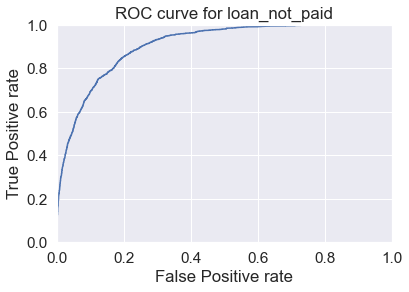

In [241]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC curve for loan_not_paid')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid(True)

In [242]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.9081332325473847